In [2]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO("""
model,learning_rate,batch_size,train_size,dataset,epoch,train_loss,val_loss,val_acc
distilbert-base-uncased,5e-5,32,6200,ag_news,0.33,0.587500,0.348796,0.887895
distilbert-base-uncased,5e-5,32,6200,ag_news,0.67,0.344500,0.312771,0.898026
distilbert-base-uncased,5e-5,32,6200,ag_news,1.00,0.308500,0.279574,0.908816
distilbert-base-uncased,5e-5,32,6200,ag_news,1.33,0.222200,0.281919,0.908947
distilbert-base-uncased,5e-5,32,6200,ag_news,1.67,0.203700,0.283824,0.907237
distilbert-base-uncased,5e-5,32,6200,ag_news,2.00,0.188900,0.272616,0.911579
distilbert-base-uncased,5e-5,32,6200,naive-7600-dataset.jsonl,0.33,0.033000,1.340805,0.727763
distilbert-base-uncased,5e-5,32,6200,naive-7600-dataset.jsonl,0.66,0.007200,1.360476,0.748684
distilbert-base-uncased,5e-5,32,6200,naive-7600-dataset.jsonl,1.00,0.003000,1.232789,0.775789
distilbert-base-uncased,5e-5,32,6200,naive-7600-dataset.jsonl,1.33,0.000400,1.522799,0.746184
distilbert-base-uncased,5e-5,32,6200,naive-7600-dataset.jsonl,1.66,0.000300,1.536974,0.746842
distilbert-base-uncased,5e-5,32,6200,naive-7600-dataset.jsonl,2.00,0.000300,1.528127,0.749737
distilbert-base-uncased,5e-5,32,6200,headlines-processed-human-dataset.jsonl,0.33,0.047500,0.832493,0.866184
distilbert-base-uncased,5e-5,32,6200,headlines-processed-human-dataset.jsonl,0.67,0.005500,0.845244,0.867763
distilbert-base-uncased,5e-5,32,6200,headlines-processed-human-dataset.jsonl,1.00,0.002900,0.823596,0.873684
distilbert-base-uncased,5e-5,32,6200,headlines-processed-human-dataset.jsonl,1.33,0.000200,0.834539,0.876974
distilbert-base-uncased,5e-5,32,6200,headlines-processed-human-dataset.jsonl,1.67,0.000100,0.844229,0.877237
distilbert-base-uncased,5e-5,32,6200,headlines-processed-human-dataset.jsonl,2.00,0.000100,0.846792,0.877500
distilbert-base-uncased,2e-4,32,6200,ag_news,0.33,0.518300,0.441936,0.851711
distilbert-base-uncased,2e-4,32,6200,ag_news,0.67,0.363800,0.330317,0.893421
distilbert-base-uncased,2e-4,32,6200,ag_news,1.00,0.340000,0.303116,0.899342
distilbert-base-uncased,2e-4,32,6200,ag_news,1.33,0.206400,0.296652,0.901316
distilbert-base-uncased,2e-4,32,6200,ag_news,1.67,0.187800,0.309522,0.908816
distilbert-base-uncased,2e-4,32,6200,ag_news,2.00,0.172400,0.292556,0.911974
distilbert-base-uncased,2e-4,32,6200,naive-7600-dataset.jsonl,0.33,0.069800,1.651127,0.753289
distilbert-base-uncased,2e-4,32,6200,naive-7600-dataset.jsonl,0.66,0.022500,1.890238,0.679868
distilbert-base-uncased,2e-4,32,6200,naive-7600-dataset.jsonl,1.00,0.000600,2.422738,0.710000
distilbert-base-uncased,2e-4,32,6200,naive-7600-dataset.jsonl,1.33,0.000200,2.638039,0.710132
distilbert-base-uncased,2e-4,32,6200,naive-7600-dataset.jsonl,1.66,0.005100,2.499940,0.719737
distilbert-base-uncased,2e-4,32,6200,naive-7600-dataset.jsonl,2.00,0.000100,2.491539,0.721447
distilbert-base-uncased,2e-4,32,6200,headlines-processed-human-dataset.jsonl,0.33,0.107500,1.290099,0.845263
distilbert-base-uncased,2e-4,32,6200,headlines-processed-human-dataset.jsonl,0.67,0.025000,1.284690,0.814868
distilbert-base-uncased,2e-4,32,6200,headlines-processed-human-dataset.jsonl,1.00,0.009900,1.629167,0.776579
distilbert-base-uncased,2e-4,32,6200,headlines-processed-human-dataset.jsonl,1.33,0.001600,1.665134,0.810132
distilbert-base-uncased,2e-4,32,6200,headlines-processed-human-dataset.jsonl,1.67,0.000100,1.705690,0.809868
distilbert-base-uncased,2e-4,32,6200,headlines-processed-human-dataset.jsonl,2.00,0.000100,1.716198,0.810000
"""))

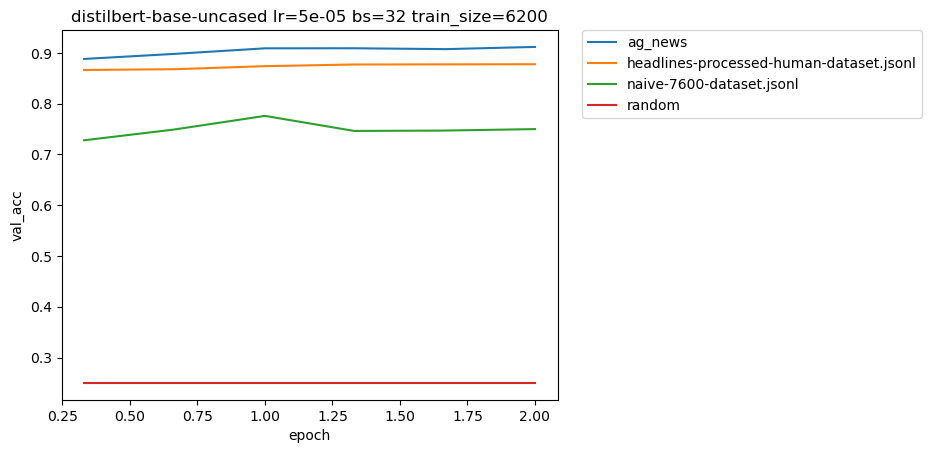

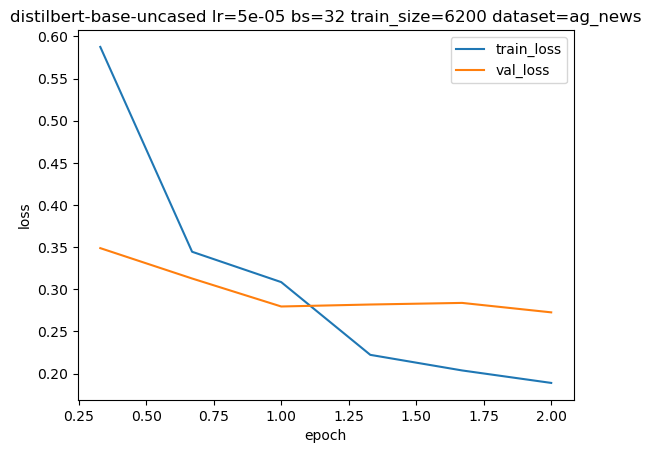

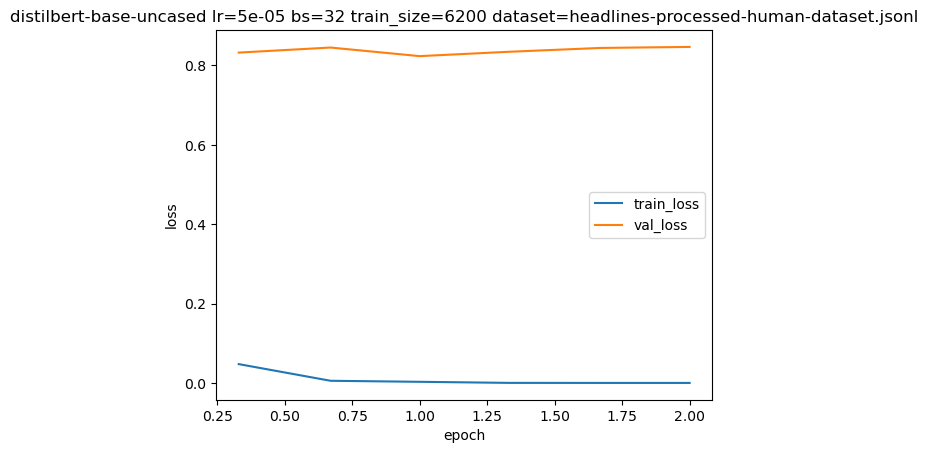

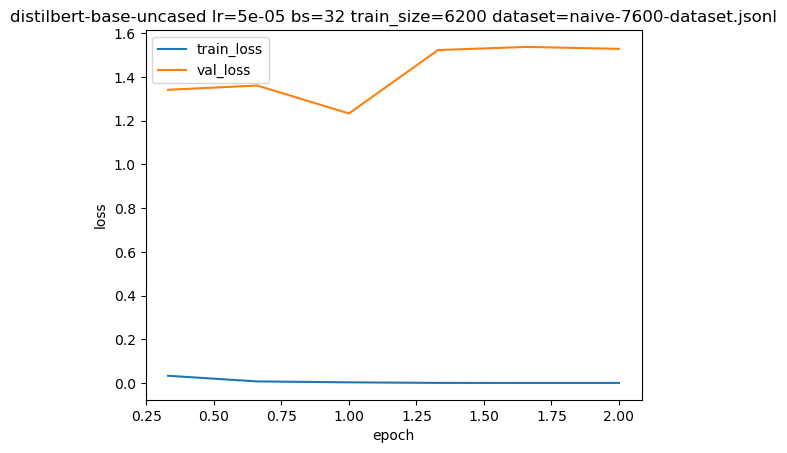

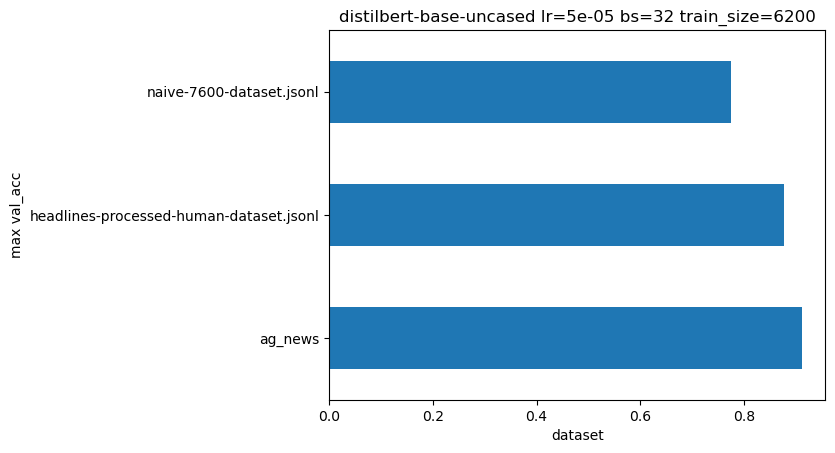

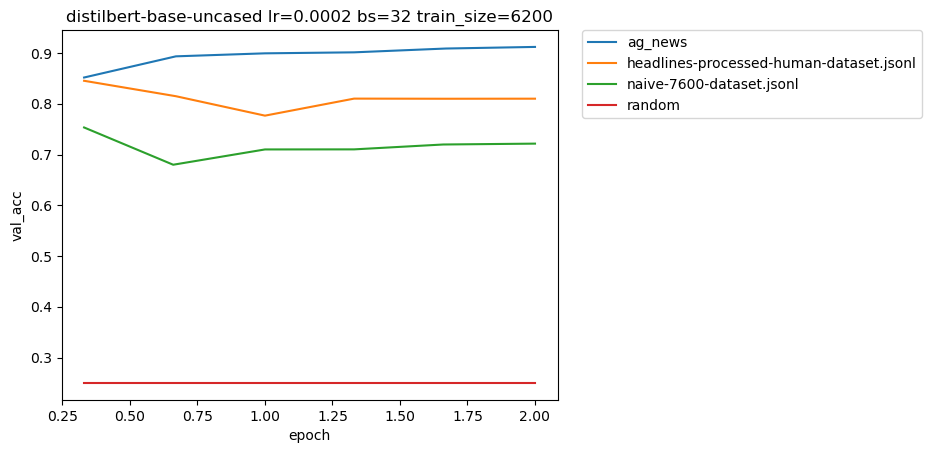

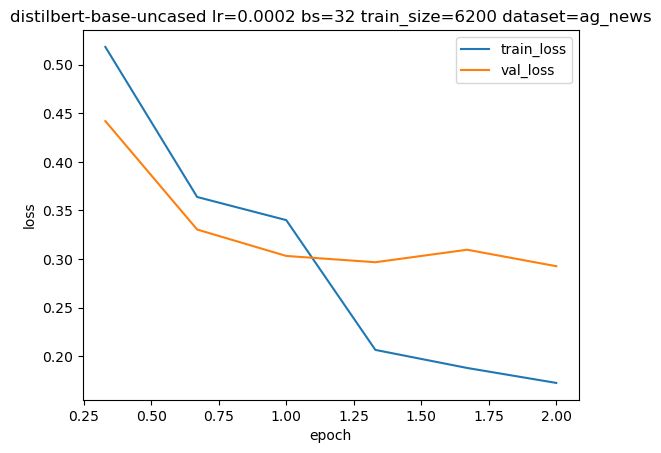

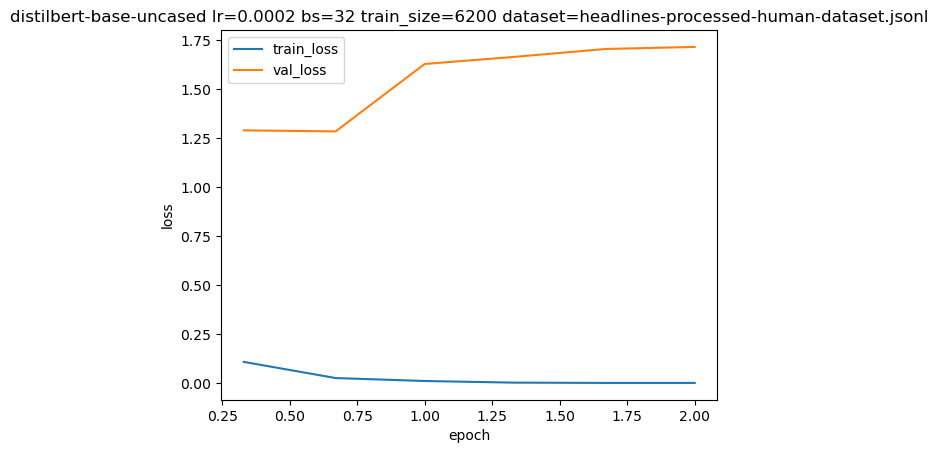

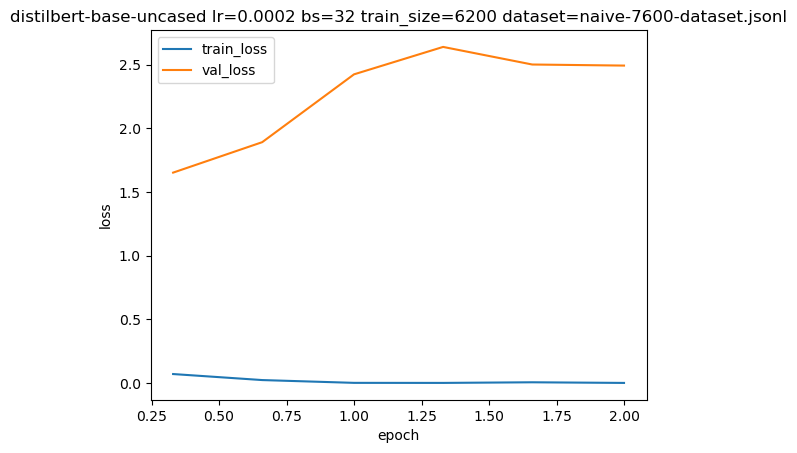

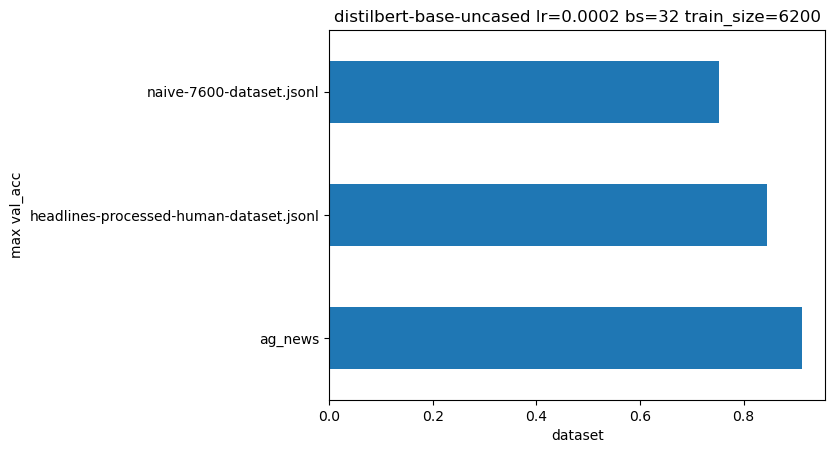

In [3]:
import matplotlib.pyplot as plt

for exp_args, df_exp in df.groupby(['model', 'learning_rate', 'batch_size', 'train_size']):
    for dataset, df_exp_dataset in df_exp.groupby('dataset'):
        plt.plot(df_exp_dataset['epoch'], df_exp_dataset['val_acc'], label=dataset)
    
    plt.plot(df_exp_dataset['epoch'], [0.25] * len(df_exp_dataset['epoch']), label='random')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title(f'{exp_args[0]} lr={exp_args[1]} bs={exp_args[2]} train_size={exp_args[3]}')
    plt.xlabel('epoch')
    plt.ylabel('val_acc')
    plt.show()

    for dataset, df_exp_dataset in df_exp.groupby('dataset'):
        plt.plot(df_exp_dataset['epoch'], df_exp_dataset['train_loss'], label='train_loss')
        plt.plot(df_exp_dataset['epoch'], df_exp_dataset['val_loss'], label='val_loss')
        plt.legend()
        plt.title(f'{exp_args[0]} lr={exp_args[1]} bs={exp_args[2]} train_size={exp_args[3]} dataset={dataset}')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()

    df_exp_max_val_acc = df_exp.groupby('dataset').max()['val_acc']
    df_exp_max_val_acc.plot.barh()
    plt.title(f'{exp_args[0]} lr={exp_args[1]} bs={exp_args[2]} train_size={exp_args[3]}')
    plt.xlabel('dataset')
    plt.ylabel('max val_acc')
    plt.show()
